In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

In [7]:
f = nc.Dataset('Data/2018/tavg1_2d_ocn_Nx-202109201458output.17833.webform.nc4', 'r')
print(f)
print()
print(f.variables.keys())
print()
print(f.dimensions['time'])
print()
print(f.variables['tskinice'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 tdrop(time, latitude, longitude), float32 tbar(time, latitude, longitude), float32 tskinice(time, latitude, longitude), float32 rainocn(time, latitude, longitude), float32 delts(time, latitude, longitude)
    groups: 

dict_keys(['time', 'longitude', 'latitude', 'tdrop', 'tbar', 'tskinice', 'rainocn', 'delts'])

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24

<class 'netCDF4._netCDF4.Variable'>
float32 tskinice(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: sea_ice_skin_temperature
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth

In [26]:
print(f.variables['tskinice'][:].shape)

(721, 1152)


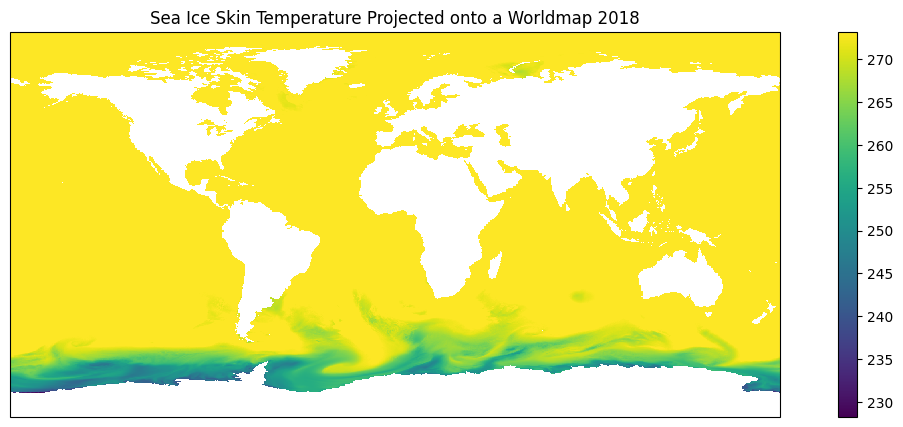

In [42]:
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]
hour_0_ice_data = f.variables['tskinice'][0, :, :]

# Plot the data on a map using cartopy and matplotlib

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.pcolormesh(lon, lat, hour_0_ice_data)
plt.colorbar(im, label=f.variables['tdrop'].units)
ax.set_title('Sea Ice Skin Temperature Projected onto a Worldmap 2018')
# ax.coastlines()

fig.set_size_inches(15, 5)

plt.show()

In [43]:
print(ax)

< GeoAxes: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs >


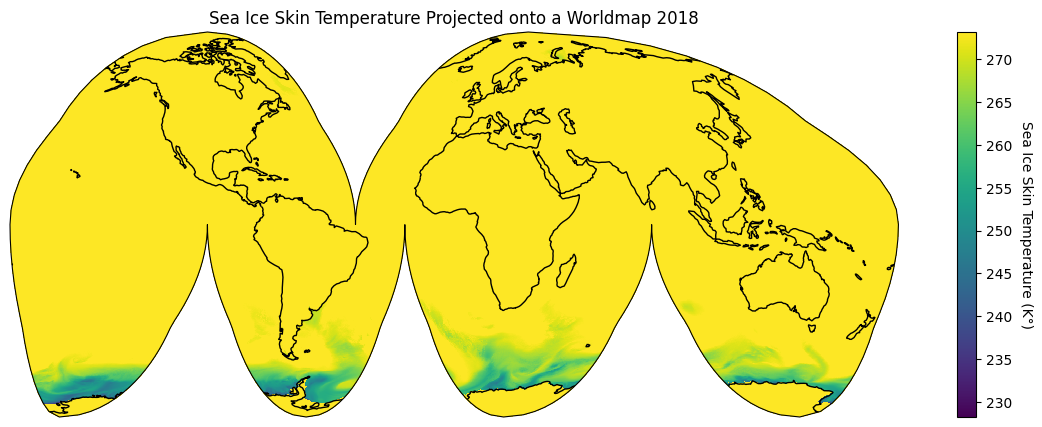

In [81]:
plt.figure(figsize=(15, 5))
ice_map = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
im = ice_map.pcolormesh(lon, lat, hour_0_ice_data, transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, label=f.variables['tskinice'].units)
cbar.set_label('Sea Ice Skin Temperature (K°)', rotation=270, labelpad=15)
ice_map.set_title('Sea Ice Skin Temperature Projected onto a Worldmap 2018')
ice_map.coastlines()

plt.show()

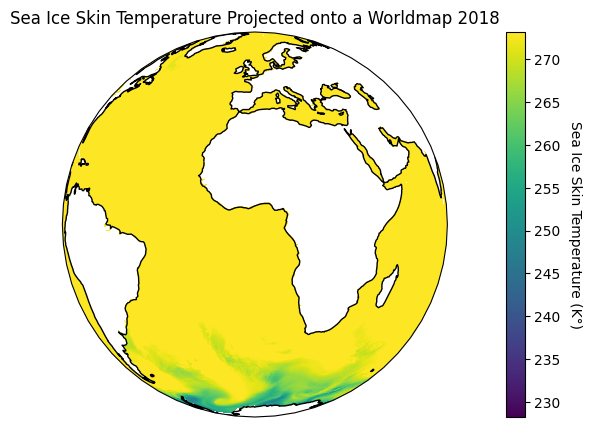

In [84]:
plt.figure(figsize=(15, 5))
ice_map = plt.axes(projection=ccrs.Orthographic())
im = ice_map.pcolormesh(lon, lat, hour_0_ice_data, transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, label=f.variables['tskinice'].units)
cbar.set_label('Sea Ice Skin Temperature (K°)', rotation=270, labelpad=15)
ice_map.set_title('Sea Ice Skin Temperature Projected onto a Worldmap 2018')
ice_map.coastlines()

plt.show()

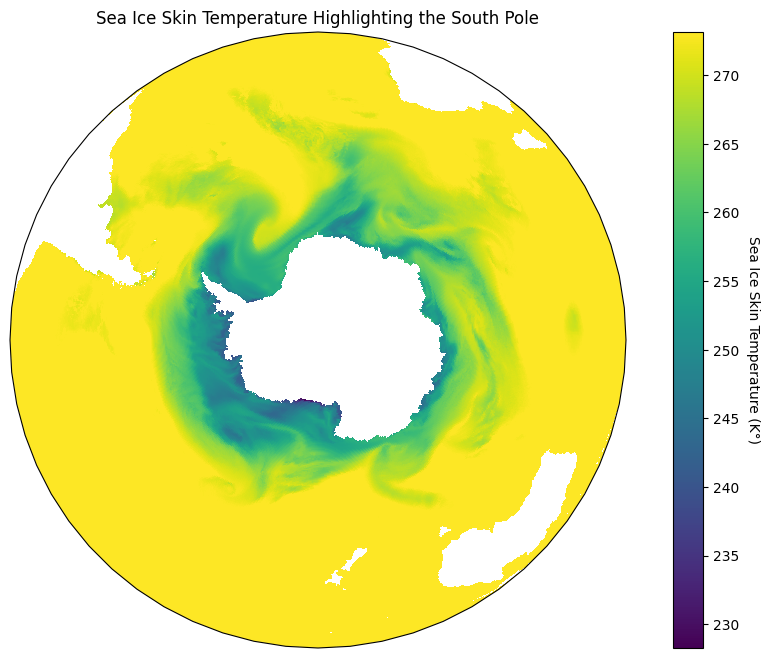

In [97]:
plt.figure(figsize=(12, 8))

# Use Orthographic projection centered at the South Pole
south_pole_map = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))

# Plot data with Plate Carrée projection
im = south_pole_map.pcolormesh(lon, lat, hour_0_ice_data, transform=ccrs.PlateCarree(), cmap = 'viridis')

# Add colorbar
cbar = plt.colorbar(im, label=f.variables['tskinice'].units)
cbar.set_label('Sea Ice Skin Temperature (K°)', rotation=270, labelpad=15)

# Set title
south_pole_map.set_title('Sea Ice Skin Temperature Highlighting the South Pole')

plt.show()